**Análisis de clustering y segmentación de clientes**

•	Técnica: Clustering con algoritmo K-means para segmentar a los clientes según su comportamiento de compra (frecuencia de compra, productos comprados, hora, ubicación). Esto ayudará a descubrir grupos de consumidores con comportamientos similares.

•	También se utiliza el Análisis de Series Temporales para identificar patrones de compra según la hora o fecha.


In [221]:
#pip install pandas scikit-learn matplotlib seaborn

In [49]:
# Verificar el tipo de la columna del nuevo dataset anonimizado
print(datos_anonimizados.dtypes)

NumeroFactura           object
FechaVenta              object
Precio                 float64
Cantidad               float64
ReferenciaProducto      object
CodigoMarca             object
IdUser                  object
NombreUser              object
CodigoNaturaleza         int64
Naturaleza              object
CodigoMedioPago          int64
MedioPago               object
NombreProducto          object
NombreMarca             object
Talla                   object
Color                   object
Grupo                   object
Fabricante              object
ClaseProducto           object
NombreEstado            object
NombreTienda            object
Clasificacion           object
DepartamentoTienda      object
CiudadTienda            object
PriceRange            category
dtype: object


In [50]:
# Convertir la columna 'FechaVenta' a formato datetime
datos_anonimizados['FechaVenta'] = pd.to_datetime(df['FechaVenta'], errors='coerce')
# Extraer características temporales (hora, día, mes, etc.)
datos_anonimizados['Hora'] = datos_anonimizados['FechaVenta'].dt.hour
datos_anonimizados['Dia'] = datos_anonimizados['FechaVenta'].dt.dayofweek
datos_anonimizados['Mes'] = datos_anonimizados['FechaVenta'].dt.month


# Verificar las primeras filas después de la transformación
print(datos_anonimizados.head())

  NumeroFactura          FechaVenta    Precio  Cantidad ReferenciaProducto  \
0         fact1 2024-01-02 08:02:00   8394.96       1.0               ref1   
1         fact2 2024-01-02 08:07:00     26.89       2.0               ref2   
2         fact2 2024-01-02 08:07:00  10077.31       5.0               ref3   
3         fact2 2024-01-02 08:07:00  10077.31       6.0               ref3   
4         fact2 2024-01-02 08:07:00  10077.31       1.0               ref3   

  CodigoMarca IdUser                        NombreUser  CodigoNaturaleza  \
0      marca1    id1  ADRIANA TERESITA SANCHEZ MENDOZA                 1   
1      marca2    id2                       NELLY ROJAS                 1   
2      marca3    id2                       NELLY ROJAS                 1   
3      marca3    id2                       NELLY ROJAS                 1   
4      marca3    id2                       NELLY ROJAS                 1   

        Naturaleza  ...  ClaseProducto NombreEstado NombreTienda  \
0  PER

In [51]:
# Verificar el tipo de la columna del nuevo dataset anonimizado despues de la conversión
print(datos_anonimizados.dtypes)

NumeroFactura                 object
FechaVenta            datetime64[ns]
Precio                       float64
Cantidad                     float64
ReferenciaProducto            object
CodigoMarca                   object
IdUser                        object
NombreUser                    object
CodigoNaturaleza               int64
Naturaleza                    object
CodigoMedioPago                int64
MedioPago                     object
NombreProducto                object
NombreMarca                   object
Talla                         object
Color                         object
Grupo                         object
Fabricante                    object
ClaseProducto                 object
NombreEstado                  object
NombreTienda                  object
Clasificacion                 object
DepartamentoTienda            object
CiudadTienda                  object
PriceRange                  category
Hora                           int32
Dia                            int32
M

**Seleccionar las Características para el Clustering**

In [52]:
# Seleccionar las columnas relevantes para el análisis de clustering
df_clustering = datos_anonimizados[['Precio', 'Cantidad', 'Hora', 'Dia', 'Mes', 'CiudadTienda']]

# Realizar un one-hot encoding para la columna 'CiudadTienda' para que pueda usarse en el modelo
df_clustering = pd.get_dummies(df_clustering, columns=['CiudadTienda'], drop_first=True)

# Verificar el dataframe de clustering
print(df_clustering.head())

     Precio  Cantidad  Hora  Dia  Mes  CiudadTienda_ARMENIA  \
0   8394.96       1.0     8    1    1                 False   
1     26.89       2.0     8    1    1                 False   
2  10077.31       5.0     8    1    1                 False   
3  10077.31       6.0     8    1    1                 False   
4  10077.31       1.0     8    1    1                 False   

   CiudadTienda_BARRANQUILLA  CiudadTienda_BELLO  CiudadTienda_BOGOTÁ D.C.  \
0                      False               False                     False   
1                      False               False                     False   
2                      False               False                     False   
3                      False               False                     False   
4                      False               False                     False   

   CiudadTienda_BUGALAGRANDE  ...  CiudadTienda_SABANETA  \
0                      False  ...                  False   
1                      False  ..

In [54]:
# Guardar el resultado en un nuevo archivo CSV
RutaSalida2 = "C:\\Users\\User\\Documents\\MAESTRIA-BIG-DATA\\MAESTRIA\\TFM\\Datos completos\\DatosLimpiosCluster.csv"
datos_anonimizados.to_csv(RutaSalida2, index=False)

**Aplicar K-means para el Clustering**

Algoritmo de clustering K-means. 

El número de clusters (k) lo determinaremos utilizando el método del codo (elbow method), que evalúa la suma de distancias cuadradas intra-cluster (SSE).

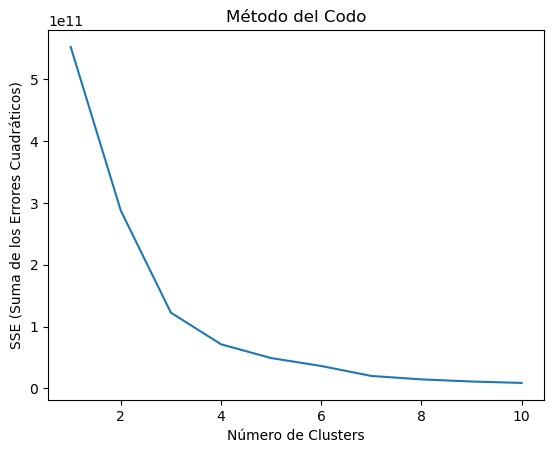

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usar el método del codo para determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de los Errores Cuadráticos)')
plt.show()


A partir de la gráfica del codo, se identifica el número óptimo de clusters donde la caída en SSE comienza a estabilizarse.

**Entrenar el Modelo K-means**

Con el número de clusters seleccionado, podemos entrenar el modelo K-means. En este caso 4

In [57]:
#clusters es 4
kmeans = KMeans(n_clusters=4, random_state=42)

# Entrenar el modelo
datos_anonimizados['Cluster'] = kmeans.fit_predict(df_clustering)

# Verificar los clusters asignados
print(datos_anonimizados[['NumeroFactura', 'Cluster']].head())

  NumeroFactura  Cluster
0         fact1        2
1         fact2        2
2         fact2        2
3         fact2        2
4         fact2        2


**Análisis de los Resultados**

Observar características se destacan en cada cluster.

In [58]:
# Agrupar por cluster y calcular la media de las características
cluster_analysis = datos_anonimizados.groupby('Cluster').agg({
    'Precio': 'mean',
    'Cantidad': 'mean',
    'Hora': 'mean',
    'Dia': 'mean',
    'Mes': 'mean'
})

# Ver el análisis por cluster
print(cluster_analysis)


               Precio  Cantidad       Hora  Dia  Mes
Cluster                                             
0        18506.446514  1.091774  10.581981  1.0  1.0
1        40424.813594  1.064516  10.658986  1.0  1.0
2         2154.791323  1.073958  10.541667  1.0  1.0
3        81901.027778  1.000000  10.888889  1.0  1.0


**Visualización de los Clusters**

Gráfico de dispersión para visualizar cómo se distribuyen los clusters. Si utilizamos varias características, podemos reducir la dimensionalidad con PCA (Análisis de Componentes Principales).

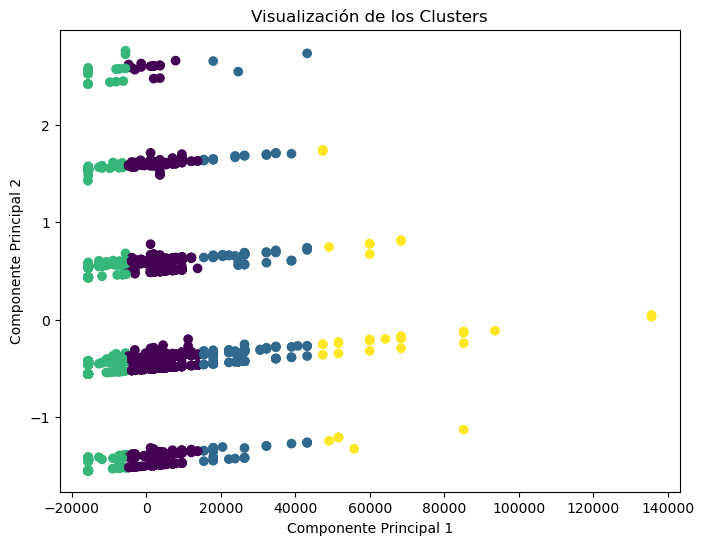

In [59]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering)

# Graficar los clusters
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=datos_anonimizados['Cluster'], cmap='viridis')
plt.title('Visualización de los Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


**Análisis de Series Temporales**

Explorar patrones de compra basados en la hora o fecha de la compra, agrupar por hora y analizar la frecuencia de las compras.

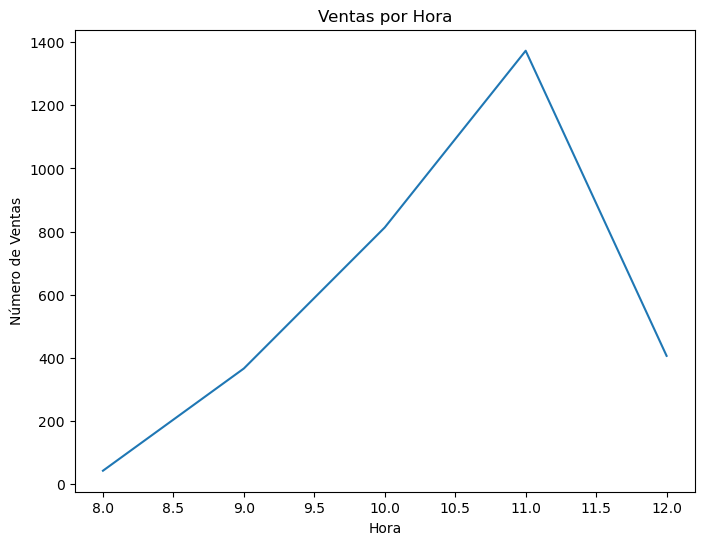

In [60]:
# Contar el número de ventas por hora
ventas_por_hora = datos_anonimizados.groupby('Hora').size()

# Graficar las ventas por hora
plt.figure(figsize=(8,6))
ventas_por_hora.plot(kind='line')
plt.title('Ventas por Hora')
plt.xlabel('Hora')
plt.ylabel('Número de Ventas')
plt.show()
